<a href="https://colab.research.google.com/github/SaurabhAradwad/NYC-Trip-Time-Prediction-Project/blob/main/NYC_Taxi_Trip_Time_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Taxi trip time Prediction 
Predicting total ride duration of taxi trips in New York City</u></b>

## <b> 1] Problem Description </b>

### Your task is to build a model that predicts the total ride duration of taxi trips in New York City. Your primary dataset is one released by the NYC Taxi and Limousine Commission, which includes pickup time, geo-coordinates, number of passengers, and several other variables.

## **2]** **Data Summary**

| Column                 | Description                                                                                                                                                                                                           |
|------------------------|-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| **id**                 | a unique identifier for each trip                                                                                                                                                                                     |
| **vendor_id**          | a code indicating the provider associated with the trip record                                                                                                                                                        |
| **pickup_datetime**    | date and time when the meter was engaged                                                                                                                                                                              |
| **dropoff_datetime**   | date and time when the meter was disengaged                                                                                                                                                                           |
| **passenger_count**    | the number of passengers in the vehicle (driver entered value)                                                                                                                                                        |
| **pickup_longitude**   | the longitude where the meter was engaged                                                                                                                                                                             |
| **pickup_latitude**    | the latitude where the meter was engaged                                                                                                                                                                              |
| **dropoff_longitude**  | the longitude where the meter was disengaged                                                                                                                                                                          |
| **dropoff_latitude**   | the latitude where the meter was disengaged                                                                                                                                                                           |
| **store_and_fwd_flag** | This flag indicates whether the trip record was held in vehicle memory before sending to the vendor because the vehicle did not have a connection to the server (Y=store and forward; N=not a store and forward trip) |
| **trip_duration**      | duration of the trip in seconds                                                                           

#<b> 01 Basic Setup

## <b> 1] Mounting drive

In [ ]:
# Mounting google drive to colab notebook
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##<b> 2] Installation 🧰 & Importing Libraries 📘




In [ ]:
# Install DataPrep library

!pip install -U dataprep

In [ ]:
# Import essential libraries 
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings; warnings.simplefilter('ignore')

#<b> 02 Import CSV 📁 dataset as 🐼 DataFrame and 🔍 Inspection

##<b> 1] Import CSV 📁 from drive

In [ ]:
# Importing csv dataset as DataFrame using Pandas Read CSV functionData
df = pd.read_csv('/content/drive/MyDrive/Capstone Project Folder/02 Superwised ML Regression/train.csv')
test = pd.read_csv("/content/drive/MyDrive/Capstone Project Folder/02 Superwised ML Regression/train.csv")
test.drop(["dropoff_datetime"], axis=1, inplace=True)

##<b> 2] Data 🔍 Inspection

In [ ]:
# Checking Head
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


In [ ]:
# Checking Head
test.head()

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,1,-73.973053,40.793209,-73.972923,40.782520,N,435


In [ ]:
# Checking Tail
df.tail()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
1458639,id2376096,2,2016-04-08 13:31:04,2016-04-08 13:44:02,4,-73.982201,40.745522,-73.994911,40.740170,N,778
1458640,id1049543,1,2016-01-10 07:35:15,2016-01-10 07:46:10,1,-74.000946,40.747379,-73.970184,40.796547,N,655
1458641,id2304944,2,2016-04-22 06:57:41,2016-04-22 07:10:25,1,-73.959129,40.768799,-74.004433,40.707371,N,764
1458642,id2714485,1,2016-01-05 15:56:26,2016-01-05 16:02:39,1,-73.982079,40.749062,-73.974632,40.757107,N,373
1458643,id1209952,1,2016-04-05 14:44:25,2016-04-05 14:47:43,1,-73.979538,40.781750,-73.972809,40.790585,N,198


In [ ]:
# Checking Tail
test.tail()

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
1458639,id2376096,2,2016-04-08 13:31:04,4,-73.982201,40.745522,-73.994911,40.740170,N,778
1458640,id1049543,1,2016-01-10 07:35:15,1,-74.000946,40.747379,-73.970184,40.796547,N,655
1458641,id2304944,2,2016-04-22 06:57:41,1,-73.959129,40.768799,-74.004433,40.707371,N,764
1458642,id2714485,1,2016-01-05 15:56:26,1,-73.982079,40.749062,-73.974632,40.757107,N,373
1458643,id1209952,1,2016-04-05 14:44:25,1,-73.979538,40.781750,-73.972809,40.790585,N,198


In [ ]:
# Checking basic info
df.info()
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   id                  1458644 non-null  object 
 1   vendor_id           1458644 non-null  int64  
 2   pickup_datetime     1458644 non-null  object 
 3   dropoff_datetime    1458644 non-null  object 
 4   passenger_count     1458644 non-null  int64  
 5   pickup_longitude    1458644 non-null  float64
 6   pickup_latitude     1458644 non-null  float64
 7   dropoff_longitude   1458644 non-null  float64
 8   dropoff_latitude    1458644 non-null  float64
 9   store_and_fwd_flag  1458644 non-null  object 
 10  trip_duration       1458644 non-null  int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 122.4+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 10 columns):
 #   Column              Non-Null Count    Dtyp

In [ ]:
# Checking default data summary using describe method and including non numerical features
df.describe(include= 'all')

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
count,1458644,1.458644e+06,1458644,1458644,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1458644,1.458644e+06
unique,1458644,NaN,1380222,1380377,NaN,NaN,NaN,NaN,NaN,2,NaN
top,id2875421,NaN,2016-03-04 08:07:34,2016-02-19 19:25:04,NaN,NaN,NaN,NaN,NaN,N,NaN
freq,1,NaN,5,5,NaN,NaN,NaN,NaN,NaN,1450599,NaN
mean,NaN,1.534950e+00,NaN,NaN,1.664530e+00,-7.397349e+01,4.075092e+01,-7.397342e+01,4.075180e+01,NaN,9.594923e+02
std,NaN,4.987772e-01,NaN,NaN,1.314242e+00,7.090186e-02,3.288119e-02,7.064327e-02,3.589056e-02,NaN,5.237432e+03
min,NaN,1.000000e+00,NaN,NaN,0.000000e+00,-1.219333e+02,3.435970e+01,-1.219333e+02,3.218114e+01,NaN,1.000000e+00
25%,NaN,1.000000e+00,NaN,NaN,1.000000e+00,-7.399187e+01,4.073735e+01,-7.399133e+01,4.073588e+01,NaN,3.970000e+02
50%,NaN,2.000000e+00,NaN,NaN,1.000000e+00,-7.398174e+01,4.075410e+01,-7.397975e+01,4.075452e+01,NaN,6.620000e+02
75%,NaN,2.000000e+00,NaN,NaN,2.000000e+00,-7.396733e+01,4.076836e+01,-7.396301e+01,4.076981e+01,NaN,1.075000e+03


## <b> 3] Data Cleaning

In [ ]:
#Count the number of duplicated rows
df.duplicated().sum()

0

In [ ]:
#Count the number of NaN values for each column
df.isna().sum()

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64

There are no **duplicated** or **missing** values.

#<b> 03 EDA 🔍 on NYC Taxi dataset




* Let's do some **Exploratary Data Analysis** on given dataset using **DataPrep.**

* For more info on **DataPrep** [click here ](https://https://dataprep.ai/)

In [ ]:
from dataprep.eda import plot
from dataprep.eda import plot_correlation
from dataprep.eda import plot_missing
from dataprep.datasets import load_dataset

sns.set(style="whitegrid", color_codes=True)
sns.set(font_scale=1)


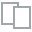
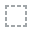
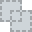
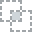
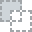
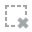
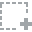
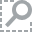
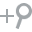
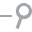
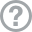
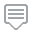
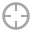
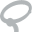
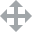
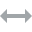
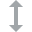
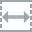
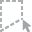
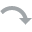
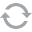
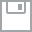
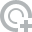
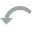
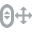
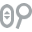
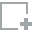
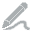
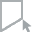
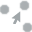
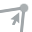
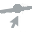

In [ ]:
plot_missing(df)


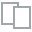
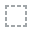
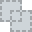
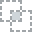
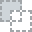
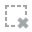
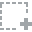
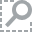
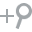
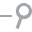
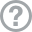
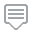
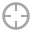
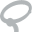
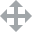
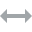
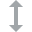
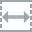
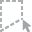
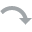
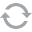
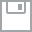
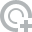
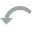
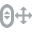
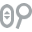
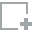
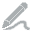
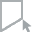
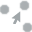
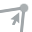
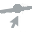

In [ ]:
plot(df)

# <b> 04 Dealing with Outliers

## <b> 1] `trip_duration` outliers

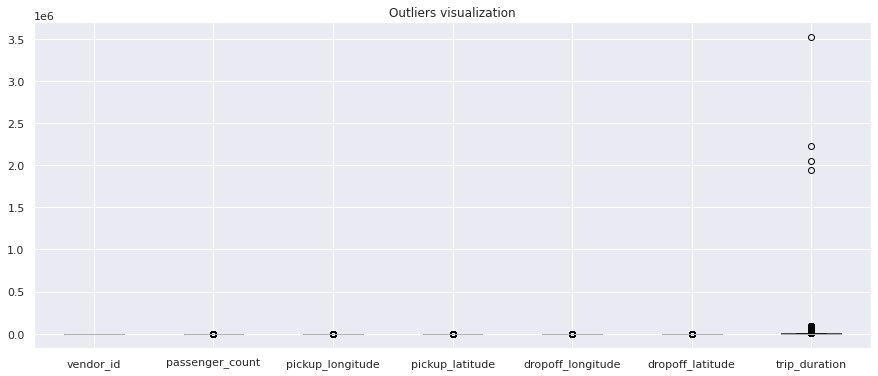

In [ ]:
#Visualize univariate outliers
plt.subplots(figsize=(15,6))
plt.title("Outliers visualization")
df.boxplot();

Comment - 

*   There are outliers for `trip_duration`. 
*   We can't find a proper interpretation and it will probably damage our model, so let's get rid of them. 

In [ ]:
# We will Only keep trips that lasted less than 6000 seconds that is 100mins
df = df[(df.trip_duration < 6000)]

## <b> 2] `passenger_count` outliers

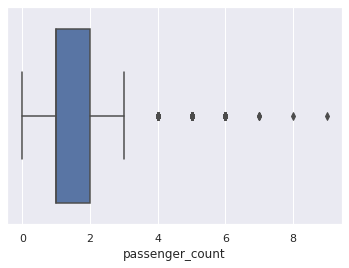

In [ ]:
#plotting boxplot of passenger 
sns.boxplot(df['passenger_count']);

Comment - 

*   

In [ ]:
#explore the passenger count and their numbers of trips 
no_of_passenger = df['passenger_count'].value_counts().reset_index()
no_of_passenger.rename(columns={'index':'no_of_passenger', 'passenger_count':'trip_counts'})

,no_of_passenger,trip_counts
0,1,1031963
1,2,209917
2,5,77849
3,3,59759
4,6,48190
5,4,28335
6,0,59
7,7,3
8,9,1
9,8,1


<b>Let us remove the rows which have 0,7,8 and 9 passenger count. We will consider these as outliers.

In [ ]:
#  Removing trips with 0 and more than 6 passenger_cout
df = df[(df.passenger_count != 0)]
df = df[(df.passenger_count <= 6)]

## <b> 3] outliers w.r.t. latitude and logitude 

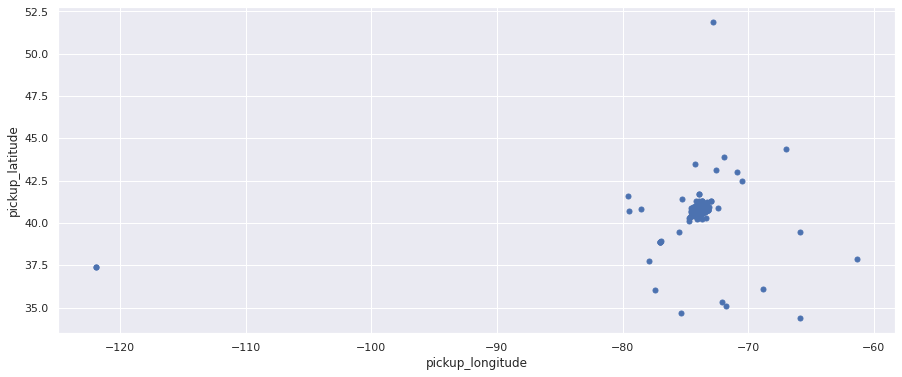

In [ ]:
#Plot pickup positions to visualize outliers
pickup_longitude = list(df.pickup_longitude)
pickup_latitude = list(df.pickup_latitude)
plt.subplots(figsize=(15,6))
plt.plot(pickup_longitude, pickup_latitude, '.', alpha = 1, markersize = 10)
plt.xlabel('pickup_longitude')
plt.ylabel('pickup_latitude')
plt.show()

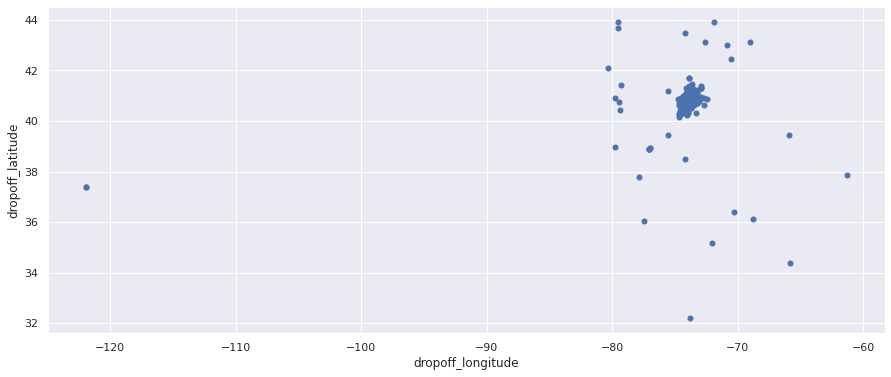

In [ ]:
#Plot dropoff positions to visualize outliers
dropoff_longitude = list(df.dropoff_longitude)
dropoff_latitude = list(df.dropoff_latitude)
plt.subplots(figsize=(15,6))
plt.plot(dropoff_longitude, dropoff_latitude, '.', alpha = 1, markersize = 10)
plt.xlabel('dropoff_longitude')
plt.ylabel('dropoff_latitude')
plt.show()

Comment - 

*   

In [ ]:
# Remove position outliers
df = df[(df.pickup_longitude > -100)]
df = df[(df.pickup_latitude < 50)]
#df = df[(df.dropoff_longitude < -100)]
#df = df[(df.dropoff_latitude < 50)]

#<b> 05  Feature Engineering


Comment - 

*   

## <b> 1] Attacking Target Value

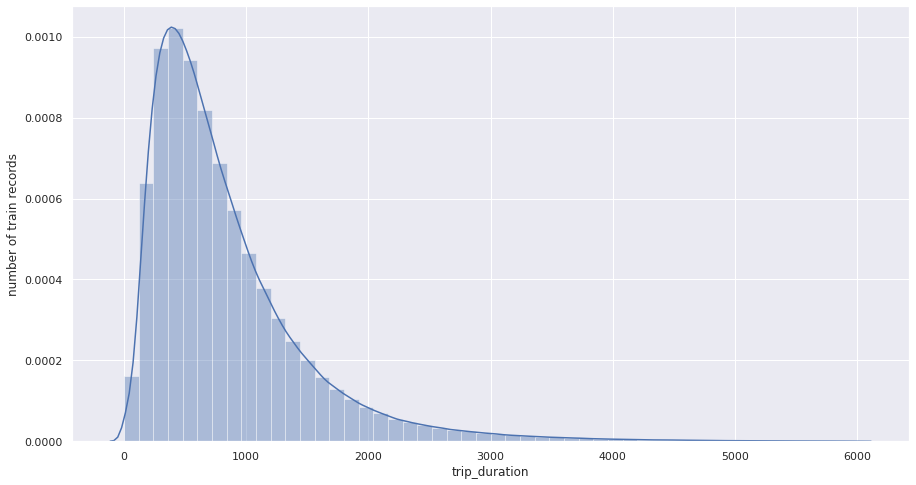

In [ ]:
# Visualize the distribution of trip_duration values
plt.figure(figsize = (15,8))
sns.distplot(df['trip_duration'])
plt.xlabel('trip_duration')
plt.ylabel('number of train records')
plt.show()

Comment - 

*   The distribution is **right-skewed** so we can consider a log-transformation of `trip_duration` column.

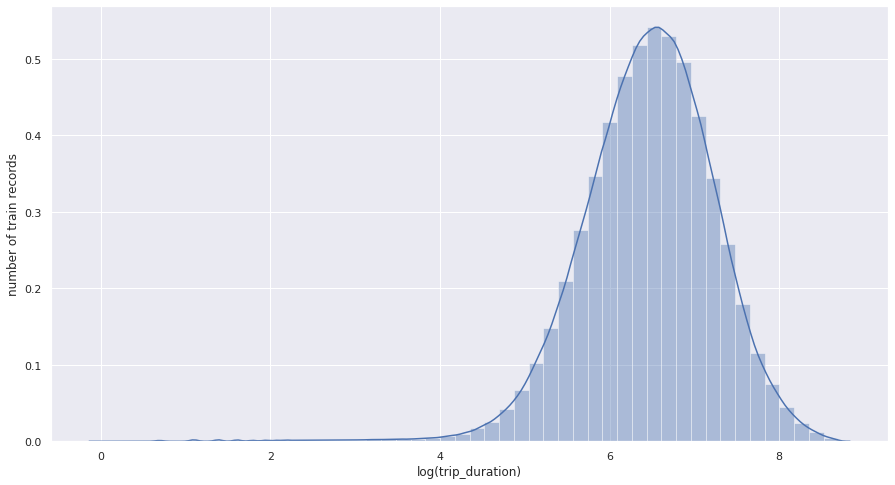

In [ ]:
# Log-transformation
plt.subplots(figsize=(15,8))
df['trip_duration'] = np.log(df['trip_duration'].values)
sns.distplot(df['trip_duration'])
plt.xlabel('log(trip_duration)')
plt.ylabel('number of train records')
plt.show()

Comment - 

*   Now `trip_duration` is normaly distributed.





## <b> 2] One hot encoading

In [ ]:
#One-hot encoding binary categorical features
df = pd.concat([df, pd.get_dummies(df['store_and_fwd_flag'])], axis=1)
test = pd.concat([test, pd.get_dummies(test['store_and_fwd_flag'])], axis=1)

df.drop(['store_and_fwd_flag'], axis=1, inplace=True)

df = pd.concat([df, pd.get_dummies(df['vendor_id'])], axis=1)
test = pd.concat([test, pd.get_dummies(test['vendor_id'])], axis=1)

df.drop(['vendor_id'], axis=1, inplace=True)

## <b> 3] Dealing with dates 

 Let us extract **pickup_datetime** and **dropoff_datetimeand** to create some new features using pandas datetime.

In [ ]:
# Datetyping the dates
df['pickup_datetime'] = pd.to_datetime(df.pickup_datetime)
test['pickup_datetime'] = pd.to_datetime(test.pickup_datetime)

df.drop(['dropoff_datetime'], axis=1, inplace=True) # as we don't have this feature in the testset

# Date features creations and deletions
df['month'] = df.pickup_datetime.dt.month
df['week'] = df.pickup_datetime.dt.week
df['weekday'] = df.pickup_datetime.dt.weekday
df['hour'] = df.pickup_datetime.dt.hour
df['minute'] = df.pickup_datetime.dt.minute
df['minute_oftheday'] = df['hour'] * 60 + df['minute']
df.drop(['minute'], axis=1, inplace=True)

test['month'] = test.pickup_datetime.dt.month
test['week'] = test.pickup_datetime.dt.week
test['weekday'] = test.pickup_datetime.dt.weekday
test['hour'] = test.pickup_datetime.dt.hour
test['minute'] = test.pickup_datetime.dt.minute
test['minute_oftheday'] = test['hour'] * 60 + test['minute']
test.drop(['minute'], axis=1, inplace=True)

df.drop(['pickup_datetime'], axis=1, inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1456010 entries, 0 to 1458643
Data columns (total 16 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   id                 1456010 non-null  object 
 1   passenger_count    1456010 non-null  int64  
 2   pickup_longitude   1456010 non-null  float64
 3   pickup_latitude    1456010 non-null  float64
 4   dropoff_longitude  1456010 non-null  float64
 5   dropoff_latitude   1456010 non-null  float64
 6   trip_duration      1456010 non-null  float64
 7   N                  1456010 non-null  uint8  
 8   Y                  1456010 non-null  uint8  
 9   1                  1456010 non-null  uint8  
 10  2                  1456010 non-null  uint8  
 11  month              1456010 non-null  int64  
 12  week               1456010 non-null  int64  
 13  weekday            1456010 non-null  int64  
 14  hour               1456010 non-null  int64  
 15  minute_oftheday    1456010 non-n

Comment - 

*   

## 4] <b> Distance and speed calculation


* During dataset research, we found that the **pickup_longitude**,     **pickup_latitude**, **dropoff_longitude** & **dropoff_latitude** have coordinates in the form of longitude and latitude. But from it, we really can't infer anything or come to any conclusions.

* Therefore, **distance** is the most obvious feature we can draw from this. Let's carry it out.


* Geopy can calculate geodesic distance between two points using the ***geodesic distance*** or the ***great-circle distance***, with a default of the geodesic distance available as the function

* For more Details refer [link text](https://geopy.readthedocs.io/en/stable/index.html?highlight=distance#module-geopy.distance)

In [ ]:
# importing geopy library
from geopy.distance import great_circle

# Creating the function for calculating distance between pickup and dropoff
def cal_distance(pickup_lat,pickup_long,dropoff_lat,dropoff_long):
 
 start_coordinates=(pickup_lat,pickup_long)
 stop_coordinates=(dropoff_lat,dropoff_long)
 
 return great_circle(start_coordinates,stop_coordinates).km

In [ ]:
# Applying the function to our dataset and creating the feature ‘distance’.
df['distance'] = df.apply(lambda x: cal_distance(x['pickup_latitude'],x['pickup_longitude'],x['dropoff_latitude'],x['dropoff_longitude'] ), axis=1)

In [ ]:
# Applying the function to our dataset and creating the feature ‘distance’.
test['distance'] = df.apply(lambda x: cal_distance(x['pickup_latitude'],x['pickup_longitude'],x['dropoff_latitude'],x['dropoff_longitude'] ), axis=1)

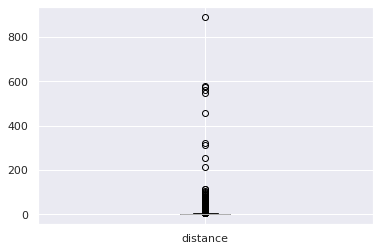

In [ ]:
# Visualize distance outliers
df.boxplot(column='distance', return_type='axes');

In [ ]:
# Removing distance outliers
df = df[(df.distance < 200)]

In [ ]:
# Creating new feature Speed
df['speed'] = df.distance/df.trip_duration

In [ ]:
# Creating new feature Speed for
test['trip_duration'] = np.log(test['trip_duration'].values)
test['speed'] = test.distance/test.trip_duration
test.drop(['trip_duration'], axis=1, inplace=True)

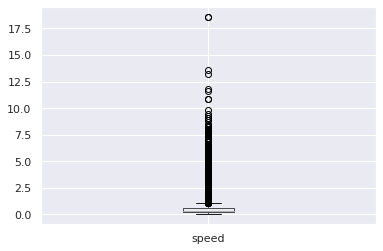

In [ ]:
# Visualize speed feature
df.boxplot(column='speed', return_type='axes');

In [ ]:
# Remove speed outliers
df = df[(df.speed < 35)]

In [ ]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1455968 entries, 0 to 1458643
Data columns (total 18 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   id                 1455968 non-null  object 
 1   passenger_count    1455968 non-null  int64  
 2   pickup_longitude   1455968 non-null  float64
 3   pickup_latitude    1455968 non-null  float64
 4   dropoff_longitude  1455968 non-null  float64
 5   dropoff_latitude   1455968 non-null  float64
 6   trip_duration      1455968 non-null  float64
 7   N                  1455968 non-null  uint8  
 8   Y                  1455968 non-null  uint8  
 9   1                  1455968 non-null  uint8  
 10  2                  1455968 non-null  uint8  
 11  month              1455968 non-null  int64  
 12  week               1455968 non-null  int64  
 13  weekday            1455968 non-null  int64  
 14  hour               1455968 non-null  int64  
 15  minute_oftheday    1455968 non-n

In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 20 columns):
 #   Column              Non-Null Count    Dtype         
---  ------              --------------    -----         
 0   id                  1458644 non-null  object        
 1   vendor_id           1458644 non-null  int64         
 2   pickup_datetime     1458644 non-null  datetime64[ns]
 3   passenger_count     1458644 non-null  int64         
 4   pickup_longitude    1458644 non-null  float64       
 5   pickup_latitude     1458644 non-null  float64       
 6   dropoff_longitude   1458644 non-null  float64       
 7   dropoff_latitude    1458644 non-null  float64       
 8   store_and_fwd_flag  1458644 non-null  object        
 9   N                   1458644 non-null  uint8         
 10  Y                   1458644 non-null  uint8         
 11  1                   1458644 non-null  uint8         
 12  2                   1458644 non-null  uint8         
 13  month       

Comment - 

*   

#<b>06 Correlation Analysis

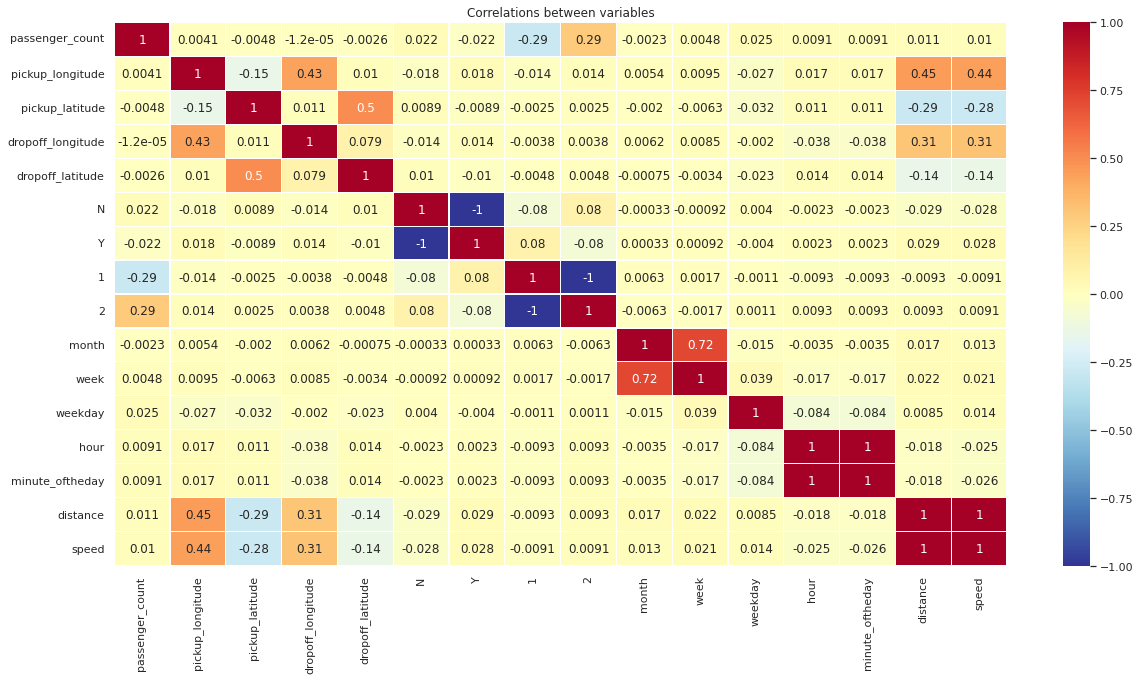

In [ ]:
# Correlations between variables
fig, ax = plt.subplots(figsize=(20,10))  
sns.heatmap(data=df.corr(), annot=True, cmap = plt.cm.RdYlBu_r, linewidths=.1, ax=ax).set_title('Correlations between variables');

#<b> 07 Preparing dataset for modeling 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

## <b> 1] Split

In [ ]:
y = df["trip_duration"]
df.drop(["trip_duration"], axis=1, inplace=True)
df.drop(['id'], axis=1, inplace=True)
X = df

X.shape, y.shape

((1455968, 16), (1455968,))

In [ ]:
#Split the labeled data frame into two sets to train then test the models
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((1164774, 16), (1164774,), (291194, 16), (291194,))

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1455968 entries, 0 to 1458643
Data columns (total 16 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   passenger_count    1455968 non-null  int64  
 1   pickup_longitude   1455968 non-null  float64
 2   pickup_latitude    1455968 non-null  float64
 3   dropoff_longitude  1455968 non-null  float64
 4   dropoff_latitude   1455968 non-null  float64
 5   N                  1455968 non-null  uint8  
 6   Y                  1455968 non-null  uint8  
 7   1                  1455968 non-null  uint8  
 8   2                  1455968 non-null  uint8  
 9   month              1455968 non-null  int64  
 10  week               1455968 non-null  int64  
 11  weekday            1455968 non-null  int64  
 12  hour               1455968 non-null  int64  
 13  minute_oftheday    1455968 non-null  int64  
 14  distance           1455968 non-null  float64
 15  speed              1455968 non-n

In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 20 columns):
 #   Column              Non-Null Count    Dtype         
---  ------              --------------    -----         
 0   id                  1458644 non-null  object        
 1   vendor_id           1458644 non-null  int64         
 2   pickup_datetime     1458644 non-null  datetime64[ns]
 3   passenger_count     1458644 non-null  int64         
 4   pickup_longitude    1458644 non-null  float64       
 5   pickup_latitude     1458644 non-null  float64       
 6   dropoff_longitude   1458644 non-null  float64       
 7   dropoff_latitude    1458644 non-null  float64       
 8   store_and_fwd_flag  1458644 non-null  object        
 9   N                   1458644 non-null  uint8         
 10  Y                   1458644 non-null  uint8         
 11  1                   1458644 non-null  uint8         
 12  2                   1458644 non-null  uint8         
 13  month       

## <b> 2] Metrics

In [ ]:
from sklearn.metrics import mean_squared_error as MSE

In [ ]:
from sklearn.metrics import mean_absolute_error

In [ ]:
from sklearn.metrics import r2_score

Comment - 

*   

#<b>08 Regression Models

## <b> 1] Try different models

In [ ]:
# Creating a function which returns model score for train and test dataet and MSE
def apply_model(model, X_train, X_test, y_train, y_test):
  model.fit(X_train, y_train) # Apply model on train dataset

  print(model.score(X_train, y_train), model.score(X_test, y_test)) # Model score on train dataset
  print(np.sqrt(MSE(y_test, model.predict(X_test)))) # Taking Square root of MSE 
  
  prediction_train = model.predict(X_train) # Prediction for train data 
  prediction_test = model.predict(X_test) # Prediction for test data 

  # Error Plot For tested and predicted data
  plt.figure(figsize=(10,5))
  sns.distplot(y_test - prediction_test)
  plt.title('Error Term', fontsize=20)
  plt.show()

Comment - 

*   

###<b> a) Linear Regression

0.4577088802126631 0.4581687677554299
0.5730803091406814


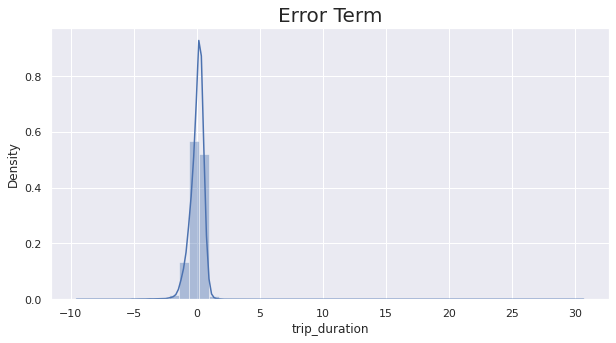

CPU times: user 2.78 s, sys: 539 ms, total: 3.32 s
Wall time: 2.56 s


In [ ]:
%%time
# Fitting Multiple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
lr =  LinearRegression()
apply_model(lr, X_train, X_test, y_train, y_test);

### <b> b) Lasso Regression

0.30253789666998965 0.30157200430059083
0.6506452874738975


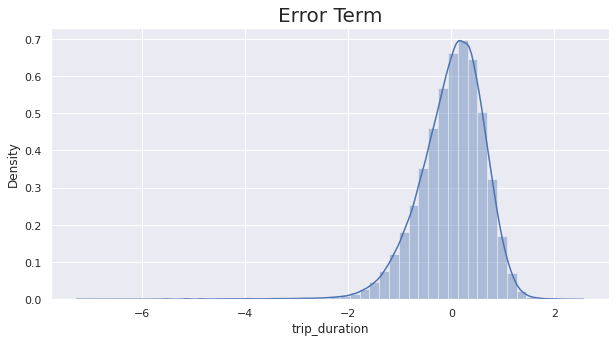

CPU times: user 2.48 s, sys: 378 ms, total: 2.86 s
Wall time: 2.33 s


In [ ]:
%%time
from sklearn.linear_model import Lasso
# Try Lasso Regression
lasso = Lasso()
apply_model(lasso, X_train, X_test, y_train, y_test);

### <b> c) Ridge Regression

0.45770885692302576 0.4581699664631613
0.5730796752198807


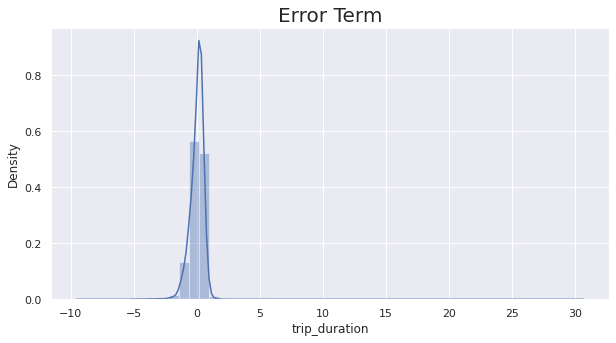

CPU times: user 2.14 s, sys: 407 ms, total: 2.55 s
Wall time: 2.09 s


In [ ]:
%%time
from sklearn.linear_model import Ridge
# Try Ridge Regression
ridge = Ridge()
apply_model(ridge, X_train, X_test, y_train, y_test);

###<b> d) Gradient Boosting

0.8076601991528932 0.807398428468072
0.34167514090485257


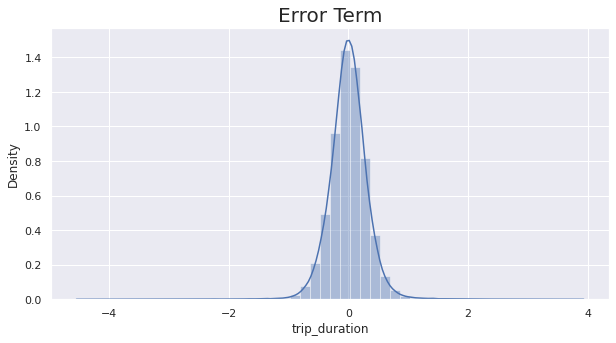

CPU times: user 8min 44s, sys: 911 ms, total: 8min 44s
Wall time: 8min 43s


In [ ]:
%%time
from sklearn.ensemble import GradientBoostingRegressor
# Try Ridge Regression
gb = GradientBoostingRegressor()
apply_model(gb, X_train, X_test, y_train, y_test);

### <b> e) XG Boost Regression

[17:16:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
0.8099197031292716 0.8097427058647245
0.3395894009891341


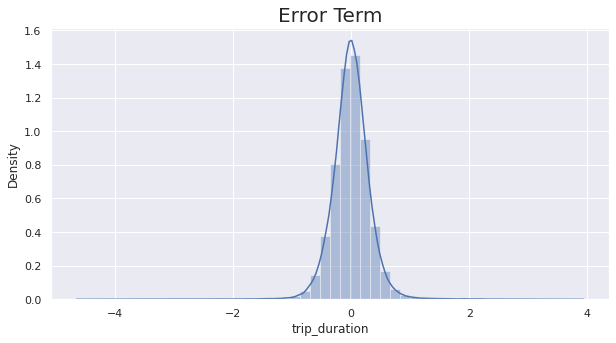

CPU times: user 2min 38s, sys: 742 ms, total: 2min 39s
Wall time: 2min 39s


In [ ]:
%%time
from xgboost import XGBRegressor
import xgboost as xgb
# Try Ridge Regression
xgb = xgb.XGBRegressor()
apply_model(xgb, X_train, X_test, y_train, y_test);

### <b> f) LGB Regression

[17:18:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
0.8099197031292716 0.8097427058647245
0.3395894009891341


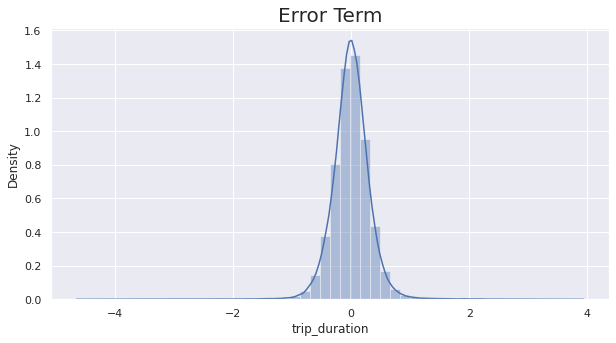

CPU times: user 2min 33s, sys: 688 ms, total: 2min 34s
Wall time: 2min 33s


In [ ]:
%%time
from lightgbm import LGBMRegressor
import lightgbm as lgb
# Try Ridge Regression
lgbm = lgb.LGBMRegressor()
apply_model(xgb, X_train, X_test, y_train, y_test);

## <b> 2] Model Comparison

In [ ]:
M_list = [lr, lasso, ridge, gb, xgb, lgbm]

In [ ]:
def eval_matrix(model_list, X_train, X_test, y_train, y_test):
  models = [str(x) for x in model_list]
  
  # Empty lists
  train_mse=[]
  train_r2=[]
  train_adjusted_r2=[]

  test_mse=[]
  test_r2=[]
  test_adjusted_r2=[]
  
  for model in model_list:
    model.fit(X_train, y_train)
    prediction_train = model.predict(X_train) # Prediction for train data 
    prediction_test = model.predict(X_test) # Prediction for test data 

    # Train data Evaluation Matrix
    tr_mse = MSE((y_train), (prediction_train)) # Train MSE
    tr_r2 = r2_score((y_train), (prediction_train)) # Train R2
    tr_r2_ = 1-(1-r2_score((y_train), (prediction_train)))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1)) # Train Adjusted R2

    # Test data Evaluation Matrix
    tst_mse  = MSE((y_test), (prediction_test)) # Test MSE
    tst_r2 = r2_score((y_test), (prediction_test)) # Test R2
    tst_r2_ = 1-(1-r2_score((y_test), (prediction_test)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) # Test Adjusted R2

    train_mse.append(tr_mse)
    train_r2.append(tr_r2)
    train_adjusted_r2.append(tr_r2_)
    test_mse.append(tst_mse)
    test_r2.append(tst_r2)
    test_adjusted_r2.append(tst_r2_)

  model_comparison = pd.DataFrame({'Model Name': models,
                          'Train MSE': train_mse,'Test MSE': test_mse,
                          'Train R^2': train_r2, 'Test R^2': test_r2,
                          'Train Adjusted R^2': train_adjusted_r2, 'Test Adjusted R^2': test_adjusted_r2})
    
  return(model_comparison)
  

In [ ]:
eval_matrix(M_list, X_train, X_test, y_train, y_test)

[17:30:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


,Model Name,Train MSE,Test MSE,Train R^2,Test R^2,Train Adjusted R^2,Test Adjusted R^2
0,LinearRegression(),0.326898,0.328421,0.457709,0.458169,0.457701,0.458139
1,Lasso(),0.420436,0.423339,0.302538,0.301572,0.302528,0.301534
2,Ridge(),0.326898,0.328420,0.457709,0.458170,0.457701,0.458140
3,GradientBoostingRegressor(),0.115944,0.116742,0.807660,0.807398,0.807658,0.807388
4,XGBRegressor(),0.114582,0.115321,0.809920,0.809743,0.809917,0.809732
5,LGBMRegressor(),0.042033,0.042141,0.930271,0.930475,0.930270,0.930472


## <b> 3] Cross-validation

In [ ]:
# Test the following parameters
lgb_params = {
    #'metric' : 'rmse',
    'learning_rate': 0.1,
    'max_depth': 25,
    'num_leaves': 1000, 
    'objective': 'regression',
    'feature_fraction': 0.9,
    'bagging_fraction': 0.5,
    'max_bin': 1000 }

#lgb_train = lgb.Dataset(X_train, y_train)
#lgb_test = lgb.Dataset(X_test, y_test)
#lgb_model = lgb.train(lgb_params, lgb_train, num_boost_round=1500, valid_sets=[lgb_train, lgb_test], early_stopping_rounds=5)

In [ ]:
#Cross-validation on LightGBM model --------------------------
lgb_df = lgb.Dataset(X, y)
lgb.cv(lgb_params, lgb_df, stratified=False) #False is needed as it only works with classification

#Cross-validation on LightGBM model (sklearn API) ------------
from sklearn.model_selection import cross_val_score
lgbm.fit(X_train, y_train)
cv_score = cross_val_score(lgbm, X, y, cv=5)
print(cv_score)
print(np.mean(cv_score))

[0.92794119 0.93023216 0.92961046 0.92952656 0.92912097]
0.9292862685765148
